## Observations and Insights 

-The drugs that seemed to be promising were effective regardless of mice gender.
-Ramicane and Capomulin were the must effective drugs.
-Tumor volume and mouse weight have a positive coorelations.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
%matplotlib inline
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='inner')
#combined_df = pd.concat([mouse_metadata, study_results], axis=1)
# Display the data table for preview
# I printed the combined data to aa csv file so I can see what I working with
combined_df.to_csv('out.csv', index=True)

In [2]:
# Checking the number of mice.
Total_mice = len(combined_df['Mouse ID'])
print(f"Total number of mice at this point is {Total_mice}")

Total number of mice at this point is 1893


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = combined_df[combined_df.duplicated(['Mouse ID', 'Timepoint'])]

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# I had to change the statement below and keep the last instance of the duplicated value since keeping the
# the first value would give a bunch of nulls. "Keep = "first"" is the default for the drop_duplicates attritube
clean_df = combined_df.drop_duplicates(['Mouse ID'] , keep="last")
# I did this to check the number of rows that had null values for Tumor Volume after dropping dups
len(clean_df[clean_df['Drug Regimen'].notnull()])

249

In [6]:
# Checking the number of mice in the clean DataFrame.
clean_count = len(clean_df['Mouse ID'])
print(f"The number of mice after getting rid of duplicates is {clean_count}")
clean_df.head()

The number of mice after getting rid of duplicates is 249


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
regimen_group = clean_df.groupby(['Drug Regimen'])

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean = pd.Series(regimen_group['Tumor Volume (mm3)'].mean(), name='Mean')
med  = pd.Series(regimen_group['Tumor Volume (mm3)'].median(), name='Median')
ver  = pd.Series(regimen_group['Tumor Volume (mm3)'].var(), name='Veriance')
std  = pd.Series(regimen_group['Tumor Volume (mm3)'].std(), name='STD')
sem  = pd.Series(regimen_group['Tumor Volume (mm3)'].sem(), name='SEM')
# Assemble the resulting series into a single summary dataframe.
Stats_Table = pd.DataFrame([mean, med, ver, std, sem])
Stats_Table = Stats_Table.T #.transpose()

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
Stats_Table.describe()
# Using the aggregation method, produce the same summary statistics in a single line


,Mean,Median,Veriance,STD,SEM
count,10.000000,10.000000,10.000000,10.000000,10.000000
mean,55.023147,56.437947,72.907701,8.407193,1.685358
std,9.965681,10.336351,24.560958,1.572971,0.317859
min,36.191390,36.561652,32.166354,5.671539,1.134308
25%,56.991217,56.844046,69.507435,8.337096,1.667419
50%,58.679752,61.002619,75.436451,8.685028,1.737006
75%,60.878384,62.151911,87.438638,9.346888,1.898775
max,62.806191,64.487812,106.029927,10.297083,2.059417


## Bar and Pie Charts

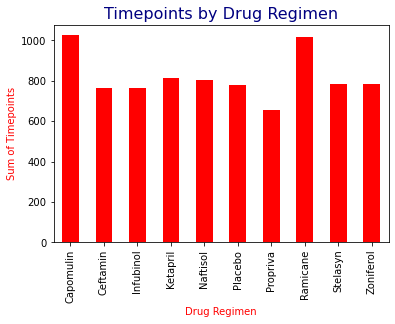

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

clean_df.groupby(['Drug Regimen'])['Timepoint'].sum().plot(kind='bar', color='r')
plt.title("Timepoints by Drug Regimen", fontsize=16, color='Navy')
plt.ylabel('Sum of Timepoints', color='Red')
plt.xlabel('Drug Regimen', color= 'r')
plt.show()

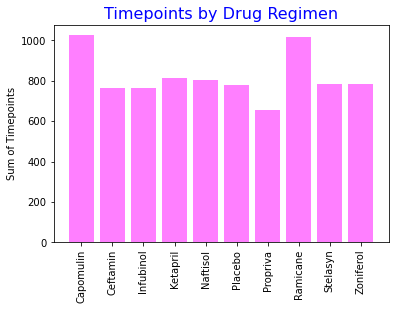

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
y = pd.Series(clean_df.groupby(['Drug Regimen'])['Timepoint'].sum())
x_axis= np.arange(len(y))

plt.bar(x_axis, y, color='Magenta', alpha=0.5, align="center")
# Magenta seems apropiate after all the hard work I put into this one
# Please let me know if there is a better way of assigning xticks label, the method I used
# could be very tedius and prone to errors if the columns are not in the right order
plt.xticks(np.arange(10),  ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril' ,'Naftisol', 'Placebo', \
                            'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol' ], rotation='vertical')
plt.title("Timepoints by Drug Regimen", fontsize=16, color='Blue')
plt.ylabel('Sum of Timepoints')
plt.show()

plt.show()

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
my_label = ['Male' , 'Female']

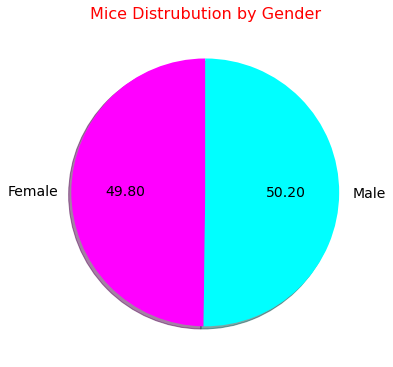

In [12]:
clean_df.groupby(['Sex'])['Sex'].count().plot(kind='pie', autopct='%.2f',   fontsize=14, figsize=(6, 10),
                                             colormap ='cool_r', subplots=True, shadow = True,startangle=90)
plt.title('Mice Distrubution by Gender', fontsize=16 , color='r')
plt.ylabel('')
plt.show()


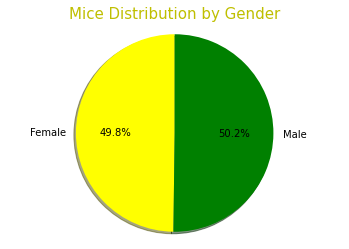

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gc = pd.Series(clean_df.groupby(['Sex'])['Sex'].count())
x_axis= np.arange(len(gc))
gen = [ 'Female' , 'Male']
colors = ["yellow","green"]
#explode = (0.1,0,0,0,0,0,0,0,0,0)  # Tell matplotlib to create a pie chart based upon the above data
plt.pie(gc,  labels=gen, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.title('Mice Distribution by Gender', fontsize=15, color='y')
plt.rcParams["figure.figsize"] = (5, 10)
# Save an image of our chart and print the final product to the screen
# I was just testing this piece of code I found and T think it is pretty cool we can easely save the
# chart we produced
plt.savefig("../Images/PyPies.png")
plt.show()


## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
d4 = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
drugs_4 = clean_df[clean_df['Drug Regimen'].isin(d4)].sort_values(by='Timepoint', ascending=False)
drugs_4.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
800,e476,Infubinol,Male,23,26,45,62.435404,1
360,g316,Capomulin,Female,22,22,45,40.159220,2
370,s710,Capomulin,Female,1,23,45,40.728578,1
380,l509,Capomulin,Male,17,21,45,41.483008,3


In [577]:
# Start by getting the last (greatest) timepoint for each mouse
# I DID NOT HAVE TO DO THIS BECAUSE WHEN I DROPPED DUPLICATES I SELECTED TO KEEP THE LAST 
# INSTANCE OF THE DUPLICATED VALUE
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

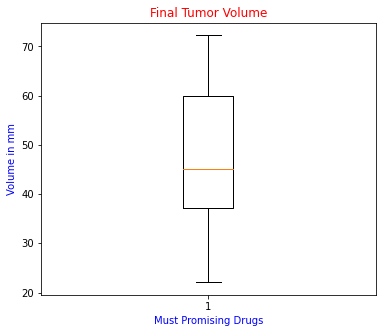

In [30]:
# Put treatments into a list for for loop (and later for plot labels)
tumor = drugs_4['Tumor Volume (mm3)']
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

plt.boxplot(tumor)
plt.rcParams["figure.figsize"] = (4, 5)
plt.title('Final Tumor Volume', color='Red')
plt.ylabel('Volume in mm', color = 'Blue')
plt.xlabel('Must Promising Drugs', color = 'Blue')
plt.show()

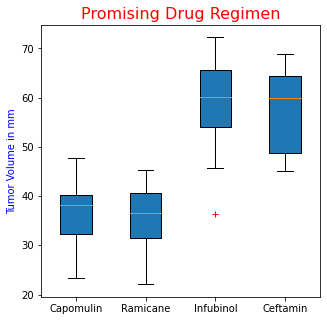

In [37]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
Capomulin = drugs_4[drugs_4['Drug Regimen']== 'Capomulin']
Capomulin = Capomulin['Tumor Volume (mm3)']
Ramicane = drugs_4[drugs_4['Drug Regimen']== 'Ramicane']
Ramicane = Ramicane['Tumor Volume (mm3)']
Infubinol = drugs_4[drugs_4['Drug Regimen']== 'Infubinol']
Infubinol = Infubinol['Tumor Volume (mm3)']
Ceftamin = drugs_4[drugs_4['Drug Regimen']== 'Ceftamin']
Ceftamin = Ceftamin['Tumor Volume (mm3)']
box_plot_data=[Capomulin,Ramicane,Infubinol,Ceftamin]

plt.boxplot(box_plot_data,patch_artist=True,labels=['Capomulin','Ramicane','Infubinol','Ceftamin'], sym=('r+'))
plt.rcParams["figure.figsize"] = (5, 5)
plt.title('Promising Drug Regimen', fontsize=16, color= 'Red')
plt.ylabel('Tumor Volume in mm', color="Blue")
plt.show()


## Line and Scatter Plots

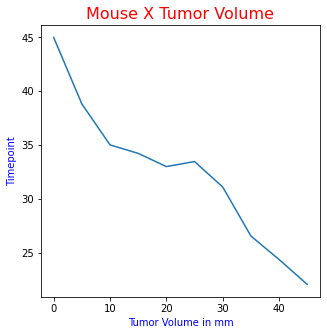

In [41]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_x = combined_df[combined_df['Mouse ID'] == "k403"]
mouse_v = mouse_x['Tumor Volume (mm3)']
mouse_t = mouse_x['Timepoint']
plt.plot(mouse_t, mouse_v)
plt.rcParams["figure.figsize"] = (5, 5)
plt.title('Mouse X Tumor Volume', color='Red', fontsize=16)
plt.xlabel('Tumor Volume in mm',color='Blue')
plt.ylabel('Timepoint', color='Blue')
plt.show()

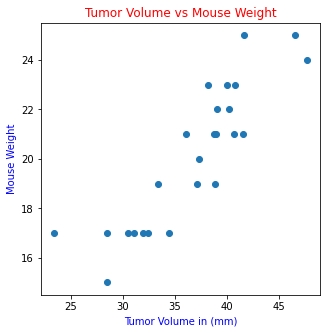

In [47]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Capomulin = drugs_4[drugs_4['Drug Regimen']== 'Capomulin']
Capomulin_v = Capomulin['Tumor Volume (mm3)']
Capomulin_mw = Capomulin['Weight (g)']

plt.scatter(Capomulin_v, Capomulin_mw)
plt.rcParams["figure.figsize"] = (5, 5)
plt.title('Tumor Volume vs Mouse Weight', color='Red')
plt.xlabel('Tumor Volume in (mm)', color='Blue')
plt.ylabel('Mouse Weight', color='Blue');